In [1]:
# import pyreadr
import numpy as np
import pandas as pd
pd.pandas.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import numpy as np

from sklearn.preprocessing import StandardScaler

In [ ]:
# clinical tsv data
# combined_clinical_tsv = pd.read_csv('dataset/combined_study_clinical_data.tsv', sep='\t')
# combined_clinical_tsv f

In [6]:
clinical_data_new_3 = pd.read_csv('combined_clinical_mutation_gene_data_new_copy.csv')
clinical_data_new_3

,PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,PATH_T_STAGE,PATH_N_STAGE,PATH_M_STAGE,HISTORY_NEOADJUVANT_TRTYN,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,PFS_STATUS,PFS_MONTHS,CANCER_TYPE,MSI_MANTIS_SCORE,MSISENSOR_SCORE,MUTATION_COUNT,TMB,PERSON_NEOPLASM_CANCER_STATUS,PROGRESS_FREE_SURVIVAL_(MONTHS),PROGRESSION_FREE_STATUS,KRAS_MUTATED,BRAF_MUTATED,NRAS_MUTATED,TP53_MUTATED,MSI_BINARY,PDCD1,CTLA4,CD274
0,TCGA-3L-AA1B,61.0,Female,STAGE I,T2,N0,M0,No,8140/3,C18.0,0:CENSORED,15.616267,Colorectal Cancer,0.3057,0.05,120.0,4.033333,Tumor Free,15.616267,0:CENSORED,0,1,1,0,0,19.3424,62.8627,11.1219
1,TCGA-4N-A93T,67.0,Male,STAGE IIIB,T4A,N1B,M0,No,8140/3,C18.2,0:CENSORED,4.799947,Colorectal Cancer,0.3317,0.69,85.0,2.900000,With Tumor,4.799947,0:CENSORED,1,0,0,1,0,12.0948,17.9003,3.8703
2,TCGA-4T-AA8H,42.0,Female,STAGE IIA,T3,N0,MX,No,8480/3,C18.6,0:CENSORED,12.657396,Colorectal Cancer,0.3144,0.17,120.0,4.000000,Tumor Free,12.657396,0:CENSORED,1,0,0,0,0,4.3868,5.1179,7.3113
3,TCGA-5M-AAT4,74.0,Male,STAGE IV,T3,N0,M1B,No,8140/3,C18.2,1:PROGRESSION,1.610941,Colorectal Cancer,0.3232,0.55,176.0,5.833333,With Tumor,1.610941,1:PROGRESSION,1,0,0,1,0,6.4544,6.8847,7.7453
4,TCGA-5M-AAT6,40.0,Female,STAGE IV,T4A,N2B,M1A,No,8140/3,C18.2,1:PROGRESSION,7.199921,Colorectal Cancer,0.6600,20.58,1860.0,62.166667,With Tumor,7.199921,1:PROGRESSION,1,0,0,0,1,91.8730,142.4030,108.2790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,TCGA-F5-6814,57.0,Male,STAGE IIA,T3,N0,M0,No,8140/3,C20.9,0:CENSORED,37.183154,Colorectal Cancer,0.3409,0.34,9459.0,316.766667,Tumor Free,37.183154,0:CENSORED,0,1,1,1,0,62.1449,105.1140,441.0510
590,TCGA-F5-6861,60.0,Female,STAGE IIA,T3,N0,M0,No,8140/3,C20.9,0:CENSORED,38.136568,Colorectal Cancer,0.3338,0.00,95.0,3.200000,Tumor Free,38.136568,0:CENSORED,1,0,0,0,0,18.5492,20.8678,7.2872
591,TCGA-F5-6863,71.0,Female,STAGE IIIB,T4A,N1,M0,No,8140/3,C20.9,1:PROGRESSION,6.279383,Colorectal Cancer,0.3566,0.08,69.0,2.300000,NaN,6.279383,1:PROGRESSION,0,0,1,1,0,5.9480,5.2045,4.0892
592,TCGA-F5-6864,74.0,Female,STAGE IIIB,T3,N2A,M0,No,8140/3,C20.9,0:CENSORED,12.460137,Colorectal Cancer,0.3486,0.19,136.0,4.533333,Tumor Free,12.460137,0:CENSORED,0,0,0,1,0,30.6586,34.8221,11.3550


In [7]:
clinical_data_new_3.columns

Index(['PATIENT_ID', 'AGE', 'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE',
       'PATH_T_STAGE', 'PATH_N_STAGE', 'PATH_M_STAGE',
       'HISTORY_NEOADJUVANT_TRTYN', 'ICD_O_3_HISTOLOGY', 'ICD_O_3_SITE',
       'PFS_STATUS', 'PFS_MONTHS', 'CANCER_TYPE', 'MSI_MANTIS_SCORE',
       'MSISENSOR_SCORE', 'MUTATION_COUNT', 'TMB',
       'PERSON_NEOPLASM_CANCER_STATUS', 'PROGRESS_FREE_SURVIVAL_(MONTHS)',
       'PROGRESSION_FREE_STATUS', 'KRAS_MUTATED', 'BRAF_MUTATED',
       'NRAS_MUTATED', 'TP53_MUTATED', 'MSI_BINARY', 'PDCD1', 'CTLA4',
       'CD274'],
      dtype='object')

In [10]:
input_feat = [
 'AGE', 'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE',
 'PATH_T_STAGE', 'PATH_N_STAGE', 'PATH_M_STAGE',
 'MSI_BINARY', 'TMB',
 'KRAS_MUTATED', 'BRAF_MUTATED', 'NRAS_MUTATED',
 'PDCD1', 'CTLA4', 'CD274',
 'PFS_STATUS', 'PFS_MONTHS'   # Target variables
]


input_ouput_data = clinical_data_new_3[input_feat]
# input_ouput_data = input_ouput_data.rename(columns={'SEX_X': 'SEX', 'TMB_(NONSYNONYMOUS)': 'TMB'})
input_ouput_data

,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,PATH_T_STAGE,PATH_N_STAGE,PATH_M_STAGE,MSI_BINARY,TMB,KRAS_MUTATED,BRAF_MUTATED,NRAS_MUTATED,PDCD1,CTLA4,CD274,PFS_STATUS,PFS_MONTHS
0,61.0,Female,STAGE I,T2,N0,M0,0,4.033333,0,1,1,19.3424,62.8627,11.1219,0:CENSORED,15.616267
1,67.0,Male,STAGE IIIB,T4A,N1B,M0,0,2.900000,1,0,0,12.0948,17.9003,3.8703,0:CENSORED,4.799947
2,42.0,Female,STAGE IIA,T3,N0,MX,0,4.000000,1,0,0,4.3868,5.1179,7.3113,0:CENSORED,12.657396
3,74.0,Male,STAGE IV,T3,N0,M1B,0,5.833333,1,0,0,6.4544,6.8847,7.7453,1:PROGRESSION,1.610941
4,40.0,Female,STAGE IV,T4A,N2B,M1A,1,62.166667,1,0,0,91.8730,142.4030,108.2790,1:PROGRESSION,7.199921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,57.0,Male,STAGE IIA,T3,N0,M0,0,316.766667,0,1,1,62.1449,105.1140,441.0510,0:CENSORED,37.183154
590,60.0,Female,STAGE IIA,T3,N0,M0,0,3.200000,1,0,0,18.5492,20.8678,7.2872,0:CENSORED,38.136568
591,71.0,Female,STAGE IIIB,T4A,N1,M0,0,2.300000,0,0,1,5.9480,5.2045,4.0892,1:PROGRESSION,6.279383
592,74.0,Female,STAGE IIIB,T3,N2A,M0,0,4.533333,0,0,0,30.6586,34.8221,11.3550,0:CENSORED,12.460137


In [11]:
nan_counts = input_ouput_data.isna().sum()
columns_with_nans = nan_counts[nan_counts > 0]
columns_with_nans

AGE                             2
SEX                             2
AJCC_PATHOLOGIC_TUMOR_STAGE    14
PATH_T_STAGE                    2
PATH_N_STAGE                    2
PATH_M_STAGE                    9
TMB                            60
PDCD1                           2
CTLA4                           2
CD274                           2
PFS_STATUS                      3
PFS_MONTHS                      4
dtype: int64

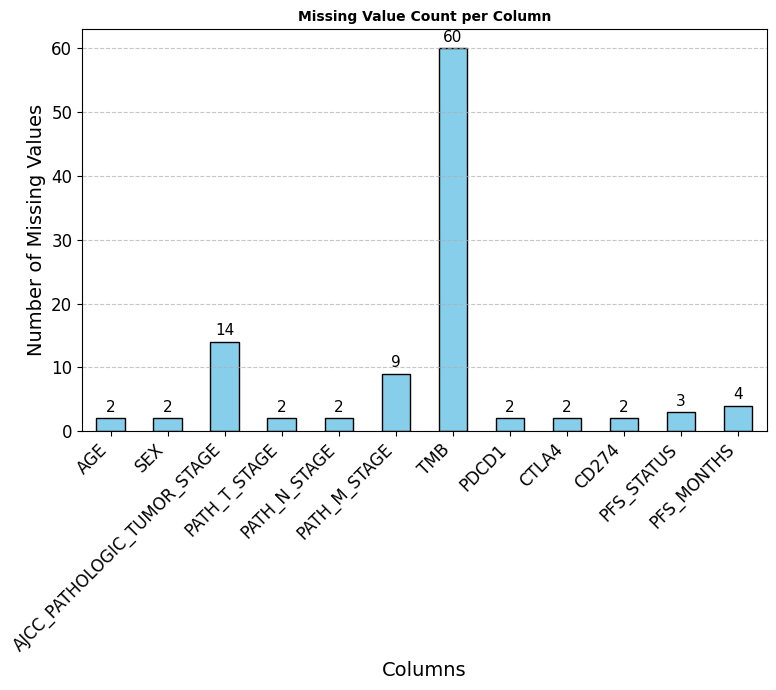

In [14]:
import matplotlib.pyplot as plt

# Calculate missing value counts
nan_counts = input_ouput_data.isna().sum()
columns_with_nans = nan_counts[nan_counts > 0]

# Plot
plt.figure(figsize=(8, 7))
bars = columns_with_nans.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Missing Value Count per Column', fontsize=10, fontweight='bold')
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add number labels on top of bars
for p in bars.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 1,
             int(p.get_height()), ha='center', fontsize=11, color='black')

plt.show()

In [12]:
data_without_nan = input_ouput_data.dropna()
data_without_nan

,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,PATH_T_STAGE,PATH_N_STAGE,PATH_M_STAGE,MSI_BINARY,TMB,KRAS_MUTATED,BRAF_MUTATED,NRAS_MUTATED,PDCD1,CTLA4,CD274,PFS_STATUS,PFS_MONTHS
0,61.0,Female,STAGE I,T2,N0,M0,0,4.033333,0,1,1,19.3424,62.8627,11.1219,0:CENSORED,15.616267
1,67.0,Male,STAGE IIIB,T4A,N1B,M0,0,2.900000,1,0,0,12.0948,17.9003,3.8703,0:CENSORED,4.799947
2,42.0,Female,STAGE IIA,T3,N0,MX,0,4.000000,1,0,0,4.3868,5.1179,7.3113,0:CENSORED,12.657396
3,74.0,Male,STAGE IV,T3,N0,M1B,0,5.833333,1,0,0,6.4544,6.8847,7.7453,1:PROGRESSION,1.610941
4,40.0,Female,STAGE IV,T4A,N2B,M1A,1,62.166667,1,0,0,91.8730,142.4030,108.2790,1:PROGRESSION,7.199921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,57.0,Male,STAGE IIA,T3,N0,M0,0,316.766667,0,1,1,62.1449,105.1140,441.0510,0:CENSORED,37.183154
590,60.0,Female,STAGE IIA,T3,N0,M0,0,3.200000,1,0,0,18.5492,20.8678,7.2872,0:CENSORED,38.136568
591,71.0,Female,STAGE IIIB,T4A,N1,M0,0,2.300000,0,0,1,5.9480,5.2045,4.0892,1:PROGRESSION,6.279383
592,74.0,Female,STAGE IIIB,T3,N2A,M0,0,4.533333,0,0,0,30.6586,34.8221,11.3550,0:CENSORED,12.460137


In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib


def preprocess_survival_classification(df):
    # Define features (now includes PFS_MONTHS as a numerical input)
    numerical_features = [
        'AGE', 'TMB', 'PDCD1', 'CTLA4', 'CD274',
        'KRAS_MUTATED', 'BRAF_MUTATED', 'NRAS_MUTATED',
        'MSI_BINARY', 'PFS_MONTHS'
    ]

    categorical_features = [
        'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE', 
        'PATH_T_STAGE', 'PATH_N_STAGE', 'PATH_M_STAGE'
    ]

    # Combine features for transformation
    X = df[numerical_features + categorical_features]

    # Define transformers
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(sparse_output=False)

    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    # Fit and transform the input features
    X_processed = preprocessor.fit_transform(X)

    # Save the fitted preprocessor
    joblib.dump(preprocessor, "preprocessor_pipeline.pkl")

    # Get final column names
    cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    final_columns = numerical_features + list(cat_columns)

    # Convert to DataFrame with feature names
    X_final = pd.DataFrame(X_processed, columns=final_columns, index=df.index)

    return X_final



In [17]:
X_final = preprocess_survival_classification(data_without_nan)
X_final

,AGE,TMB,PDCD1,CTLA4,CD274,KRAS_MUTATED,BRAF_MUTATED,NRAS_MUTATED,MSI_BINARY,PFS_MONTHS,SEX_Female,SEX_Male,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE I,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IA,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE II,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIA,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIB,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIC,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE III,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIIA,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIIB,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIIC,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IV,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IVA,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IVB,PATH_T_STAGE_T1,PATH_T_STAGE_T2,PATH_T_STAGE_T3,PATH_T_STAGE_T4,PATH_T_STAGE_T4A,PATH_T_STAGE_T4B,PATH_T_STAGE_TIS,PATH_N_STAGE_N0,PATH_N_STAGE_N1,PATH_N_STAGE_N1A,PATH_N_STAGE_N1B,PATH_N_STAGE_N1C,PATH_N_STAGE_N2,PATH_N_STAGE_N2A,PATH_N_STAGE_N2B,PATH_M_STAGE_M0,PATH_M_STAGE_M1,PATH_M_STAGE_M1A,PATH_M_STAGE_M1B,PATH_M_STAGE_MX
0,-0.370414,-0.265612,-0.351348,0.436468,-0.366170,-0.835868,2.697071,3.753430,-0.394215,-0.377429,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.091928,-0.296742,-0.498618,-0.474160,-0.503280,1.196361,-0.370773,-0.266423,-0.394215,-0.824447,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.834497,-0.266528,-0.655242,-0.733043,-0.438219,1.196361,-0.370773,-0.266423,-0.394215,-0.499714,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.631327,-0.216170,-0.613229,-0.697260,-0.430013,1.196361,-0.370773,-0.266423,-0.394215,-0.956243,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.988611,1.331176,1.122457,2.047404,1.470835,1.196361,-0.370773,-0.266423,2.536687,-0.725261,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.678642,8.324451,0.518389,1.292187,7.762746,-0.835868,2.697071,3.753430,-0.394215,0.513889,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
590,-0.447471,-0.288502,-0.367466,-0.414059,-0.438674,1.196361,-0.370773,-0.266423,-0.394215,0.553292,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
591,0.400156,-0.313223,-0.623519,-0.731289,-0.499141,-0.835868,-0.370773,3.753430,-0.394215,-0.763305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
592,0.631327,-0.251878,-0.121406,-0.131441,-0.361762,-0.835868,-0.370773,-0.266423,-0.394215,-0.507866,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Classification Model

In [23]:
import numpy as np
import pandas as pd
pd.pandas.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
# import pyreadr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.cm as cm

In [21]:
# input_feat_data_scaled = X_final.copy()
# input_feat_data_scaled['PFS_MONTH']=  y_time.values 
# target_data = target_data.copy()
# input_feat_data_scaled

target_data = data_without_nan['PFS_STATUS']
target_data

if target_data.dtype == 'object' or target_data.dtype.name == 'category':
    target_data = target_data.map({'0:CENSORED': 0, '1:PROGRESSION': 1})

target_data.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
589    False
590    False
591    False
592    False
593    False
Name: PFS_STATUS, Length: 513, dtype: bool

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}
# train/test split based on the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(input_feat_data_scaled, target_data, test_size=0.2, random_state=42)#stratify=target_data)

In [25]:
X_train_scaled

,AGE,TMB,PDCD1,CTLA4,CD274,KRAS_MUTATED,BRAF_MUTATED,NRAS_MUTATED,MSI_BINARY,SEX_Female,SEX_Male,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE I,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IA,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE II,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIA,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIB,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIC,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE III,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIIA,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIIB,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIIC,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IV,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IVA,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IVB,PATH_T_STAGE_T1,PATH_T_STAGE_T2,PATH_T_STAGE_T3,PATH_T_STAGE_T4,PATH_T_STAGE_T4A,PATH_T_STAGE_T4B,PATH_T_STAGE_TIS,PATH_N_STAGE_N0,PATH_N_STAGE_N1,PATH_N_STAGE_N1A,PATH_N_STAGE_N1B,PATH_N_STAGE_N1C,PATH_N_STAGE_N2,PATH_N_STAGE_N2A,PATH_N_STAGE_N2B,PATH_M_STAGE_M0,PATH_M_STAGE_M1,PATH_M_STAGE_M1A,PATH_M_STAGE_M1B,PATH_M_STAGE_MX,PFS_MONTH
378,-0.370414,-0.260119,-0.223584,-0.551198,-0.406847,-0.835868,-0.370773,-0.266423,-0.394215,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.613604
387,-0.524528,-0.282093,-0.295251,-0.497562,-0.373831,1.196361,-0.370773,-0.266423,-0.394215,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.046454
221,1.401897,-0.250963,0.636292,0.561063,0.647724,-0.835868,-0.370773,-0.266423,-0.394215,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.786238
328,-0.986870,0.589549,0.574634,0.277274,0.697733,-0.835868,-0.370773,3.753430,2.536687,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.416215
572,-0.524528,-0.280261,-0.599664,-0.737529,-0.408133,-0.835868,-0.370773,-0.266423,-0.394215,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.306671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.014871,-0.315054,0.410108,-0.241495,-0.470809,1.196361,-0.370773,-0.266423,-0.394215,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.953020
326,-0.216300,-0.321463,-0.167194,0.036639,-0.039384,-0.835868,-0.370773,-0.266423,-0.394215,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,55.922675
406,1.093669,-0.154826,-0.307283,-0.401032,-0.318538,-0.835868,-0.370773,-0.266423,-0.394215,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.418746
509,-1.295098,-0.258287,-0.463387,-0.472793,-0.484962,1.196361,-0.370773,-0.266423,-0.394215,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.016372


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Train the Extra Trees Classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 2 (Optional): Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 3: Save the trained model for Streamlit
joblib.dump(model, "extra_trees_classifier.pkl")
print("Model saved as extra_trees_classifier.pkl")

Accuracy: 0.8252427184466019
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        83
           1       0.55      0.55      0.55        20

    accuracy                           0.83       103
   macro avg       0.72      0.72      0.72       103
weighted avg       0.83      0.83      0.83       103

✅ Model saved as extra_trees_classifier.pkl


In [26]:
# initialize results list
metrics = {
    'MODEL': [],
    'ACCURACY': [],
    'PRECISION': [],
    'RECALL': [],
      'F1-SCORE': [],
    'AUC': []
}

# loop through each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # needed for AUC

    metrics['MODEL'].append(name)
    metrics['ACCURACY'].append(accuracy_score(y_test, y_pred))
    metrics['PRECISION'].append(precision_score(y_test, y_pred))
    metrics['RECALL'].append(recall_score(y_test, y_pred))
    metrics['F1-SCORE'].append(f1_score(y_test, y_pred))
    metrics['AUC'].append(roc_auc_score(y_test, y_proba))

# convert to DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df

/opt/anaconda3/envs/fcbbio/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:02:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,MODEL,ACCURACY,PRECISION,RECALL,F1-SCORE,AUC
0,Random Forest,0.825243,0.562500,0.45,0.500000,0.822892
1,Extra Trees,0.825243,0.550000,0.55,0.550000,0.804217
2,XGBoost,0.776699,0.411765,0.35,0.378378,0.714458
3,Gradient Boosting,0.815534,0.533333,0.40,0.457143,0.783735


/opt/anaconda3/envs/fcbbio/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:24:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


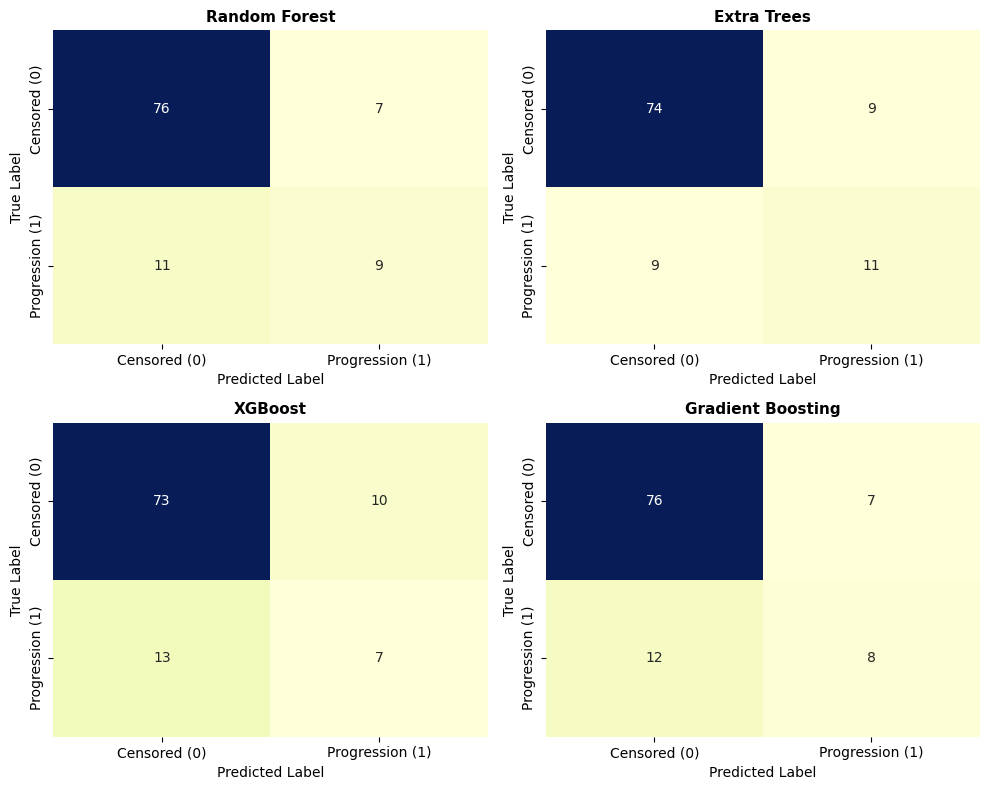

In [90]:

# confusion matrix for each model
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[i], cbar=False,
                xticklabels=['Censored (0)', 'Progression (1)'],
                yticklabels=['Censored (0)', 'Progression (1)'])
    
    axes[i].set_title(f"{name}", fontsize=11, fontweight='bold')
    # axes[i].set_title(name, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)


In [35]:
# initialize results list
metrics = {
    'MODEL': [],
    'ACCURACY': [],
    'PRECISION': [],
    'RECALL': [],
      'F1-SCORE': [],
    'AUC': []
}

# loop through each model
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # needed for AUC

    metrics['MODEL'].append(name)
    metrics['ACCURACY'].append(accuracy_score(y_test, y_pred))
    metrics['PRECISION'].append(precision_score(y_test, y_pred))
    metrics['RECALL'].append(recall_score(y_test, y_pred))
    metrics['F1-SCORE'].append(f1_score(y_test, y_pred))
    metrics['AUC'].append(roc_auc_score(y_test, y_proba))

# convert to DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df

/opt/anaconda3/envs/fcbbio/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:02:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,MODEL,ACCURACY,PRECISION,RECALL,F1-SCORE,AUC
0,Random Forest,0.825243,0.550000,0.55,0.550000,0.819880
1,Extra Trees,0.825243,0.541667,0.65,0.590909,0.814157
2,XGBoost,0.776699,0.411765,0.35,0.378378,0.766265
3,Gradient Boosting,0.815534,0.521739,0.60,0.558140,0.781928


/opt/anaconda3/envs/fcbbio/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:02:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


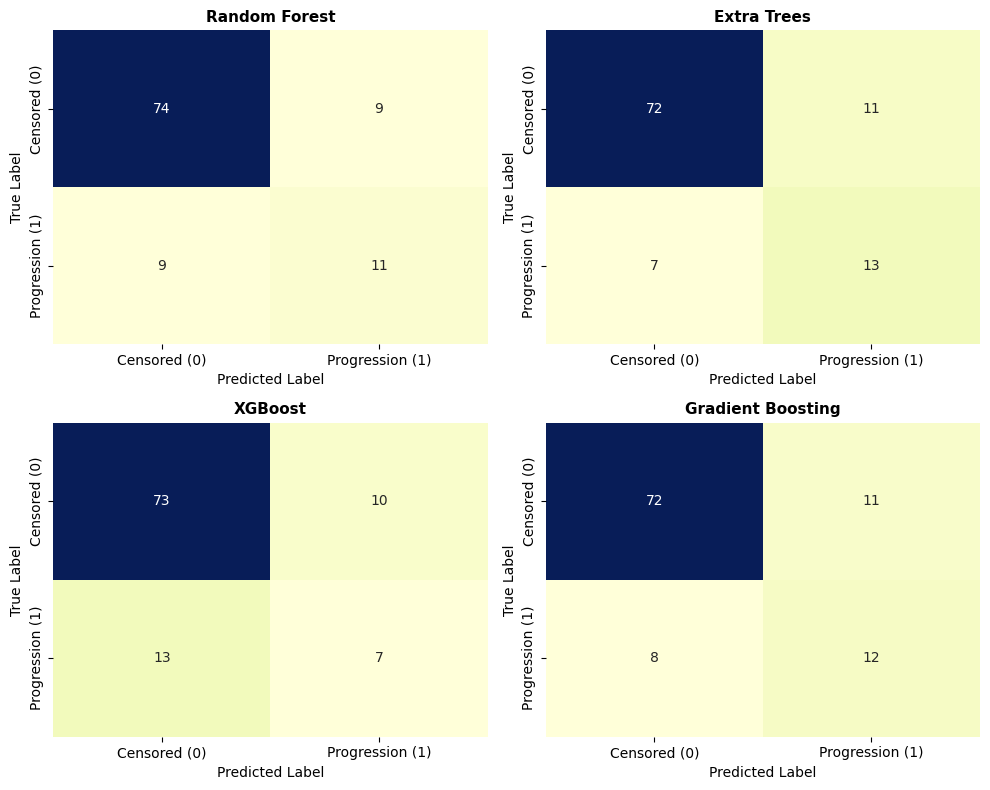

In [36]:

# confusion matrix for each model
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[i], cbar=False,
                xticklabels=['Censored (0)', 'Progression (1)'],
                yticklabels=['Censored (0)', 'Progression (1)'])
    
    axes[i].set_title(f"{name}", fontsize=11, fontweight='bold')
    # axes[i].set_title(name, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1137/2175541040.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


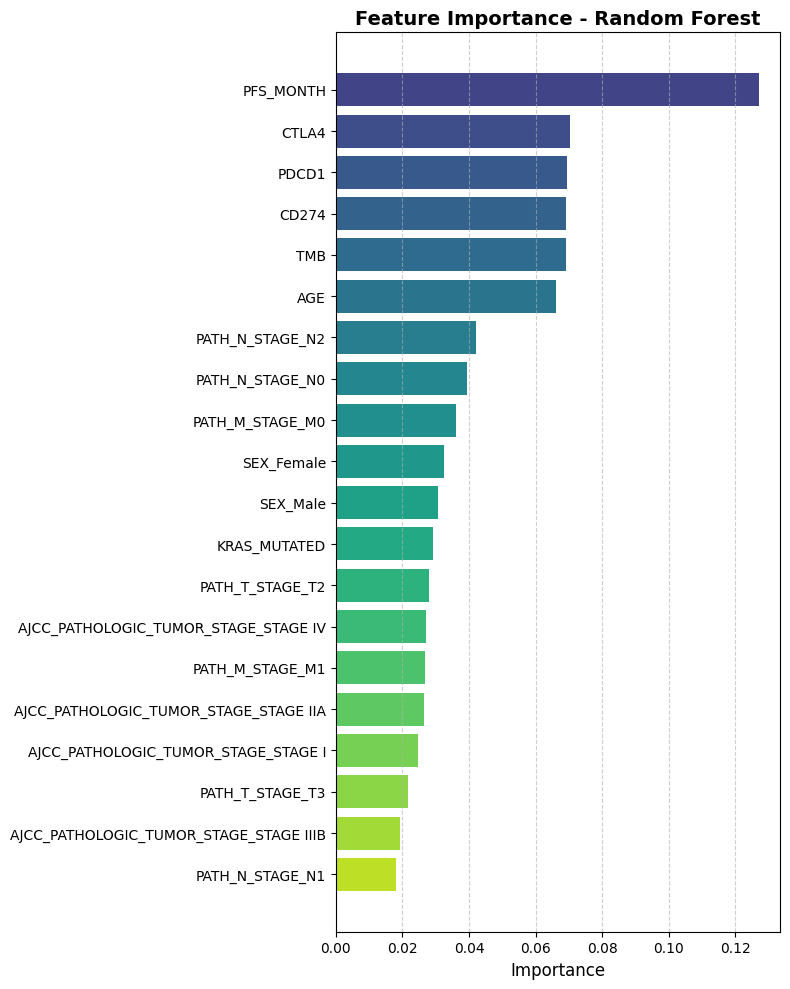

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1137/2175541040.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


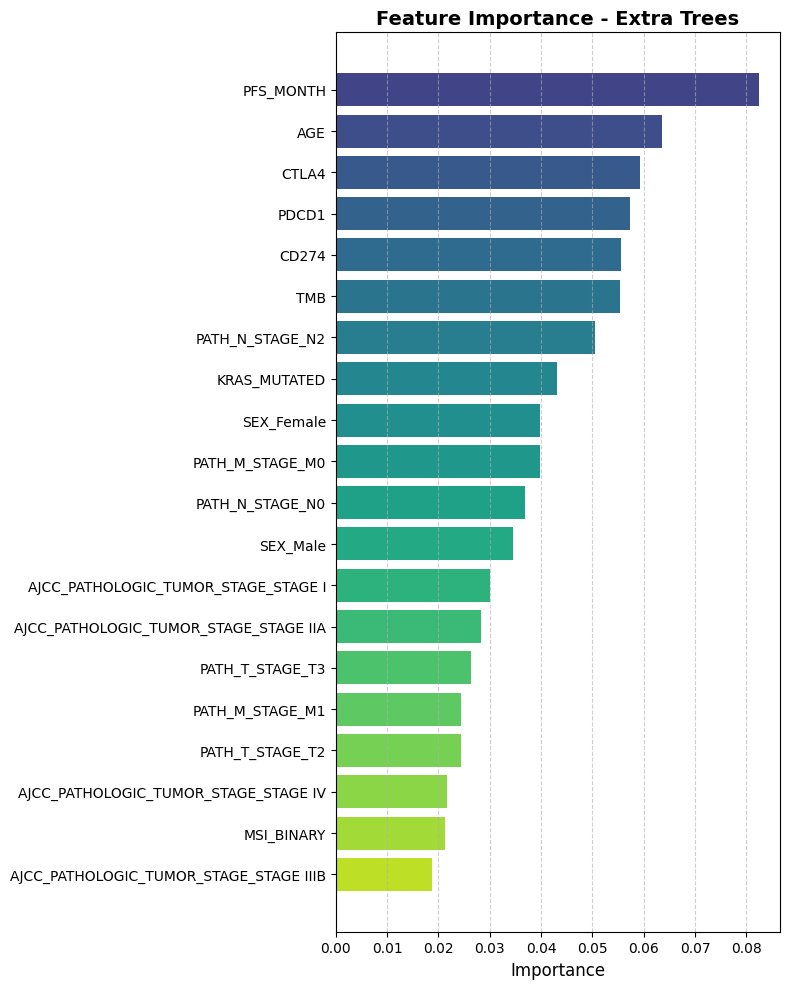

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1137/2175541040.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


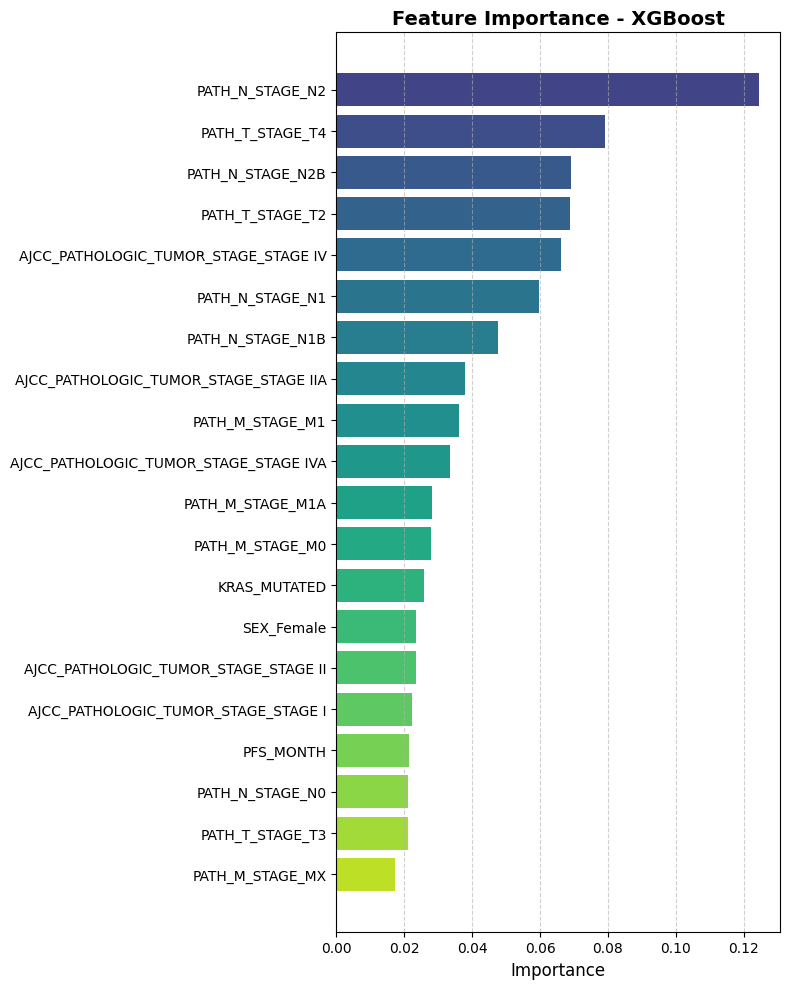

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1137/2175541040.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


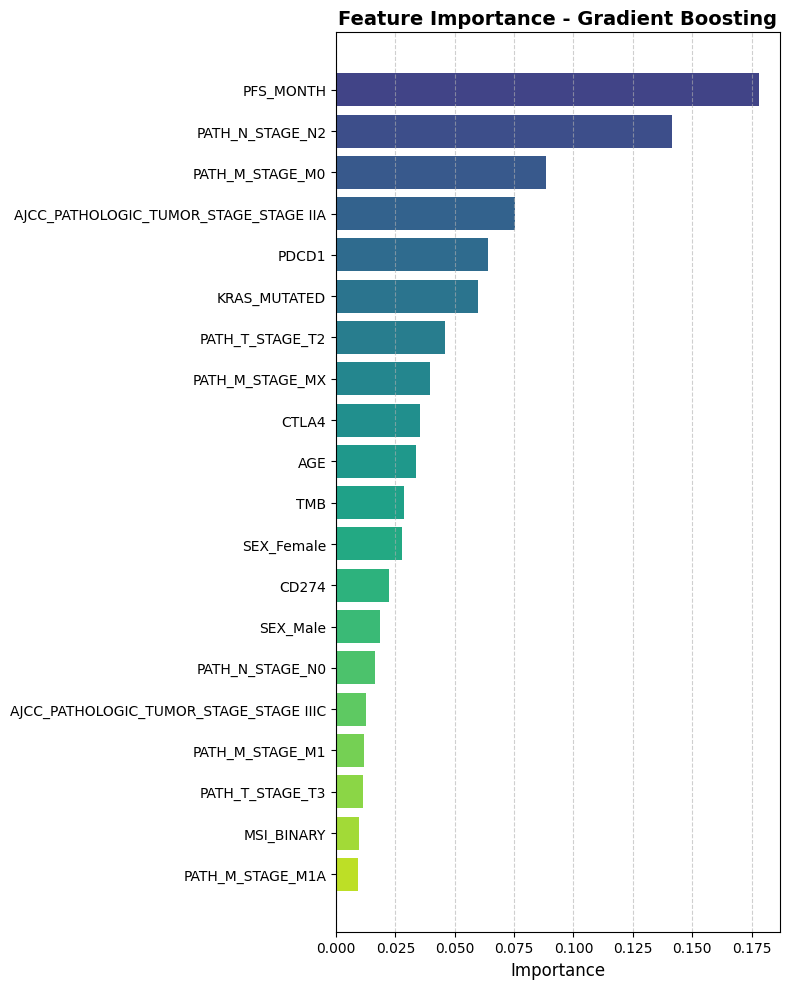

In [ ]:
## Feature Importance For Top 20 
#  

# store feature importances for each model
feature_importances = {}

# define feature names
feature_names = input_feat_data_scaled.columns if hasattr(input_feat_data_scaled, 'columns') else [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_importances[name] = importances

        # sort features by importance
        indices = np.argsort(importances)[::-1]
        sorted_importances = importances[indices][:20]  # Only top 20
        sorted_features = [feature_names[i] for i in indices[:20]]  # Only top 20

        # color map
        cmap = cm.get_cmap('viridis')
        colors = cmap(np.linspace(0.2, 0.9, len(sorted_importances)))

        # plot (vertical layout using barh)
        plt.figure(figsize=(8, 10))
        bars = plt.barh(range(len(sorted_importances)), sorted_importances, color=colors)
        plt.title(f"Feature Importance - {name}", fontsize=14, fontweight='bold')
        plt.yticks(range(len(sorted_importances)), sorted_features)
        plt.xlabel("Importance", fontsize=12)
        plt.gca().invert_yaxis()  # most important feature at the top
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show() 
    else:
        print(f"Model '{name}' does not support feature_importances_.")


/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1137/631847448.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


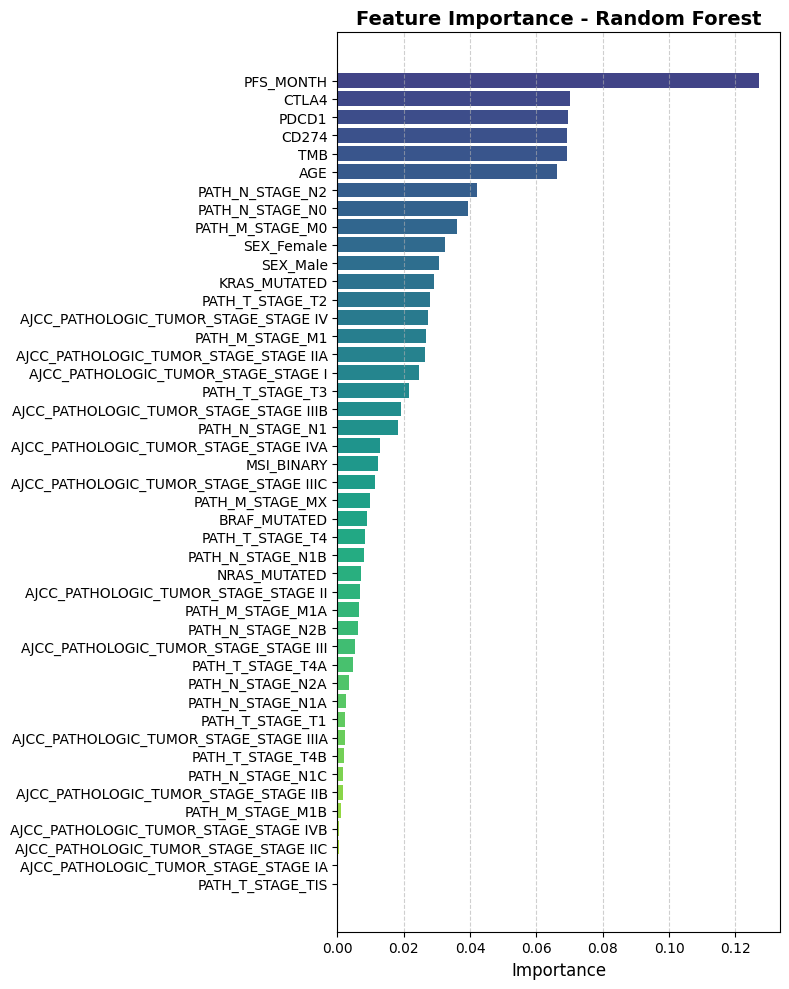

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1137/631847448.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


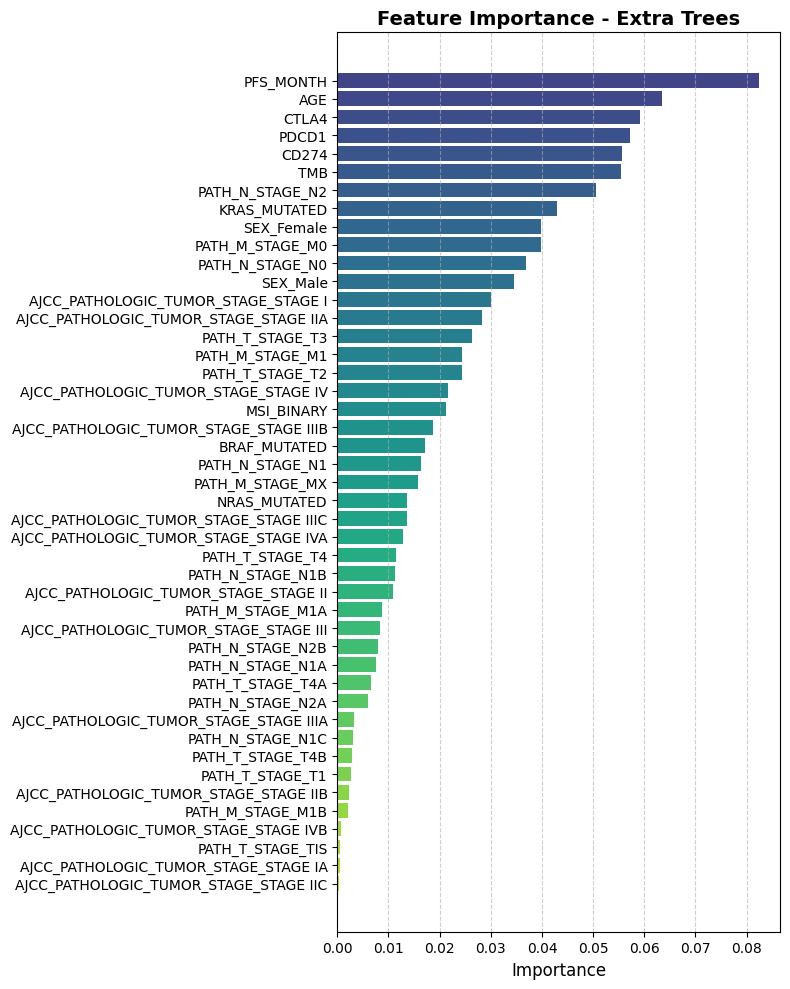

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1137/631847448.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


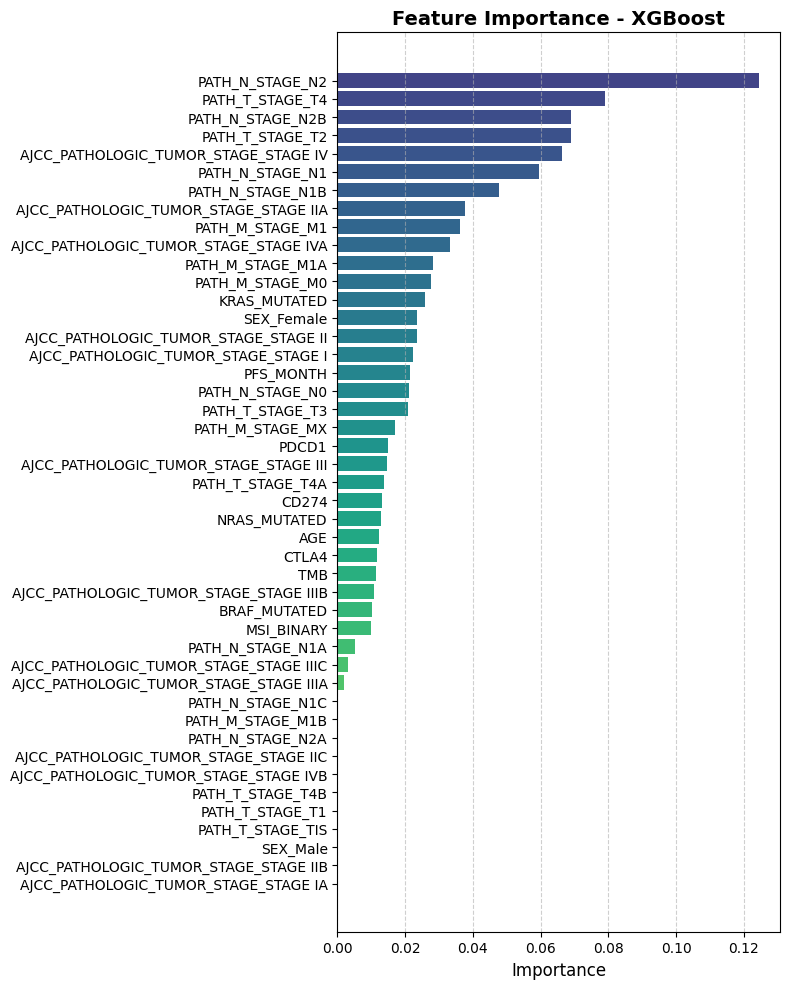

/var/folders/8s/tf002srj1_309fmkfswmhbv00000gn/T/ipykernel_1137/631847448.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


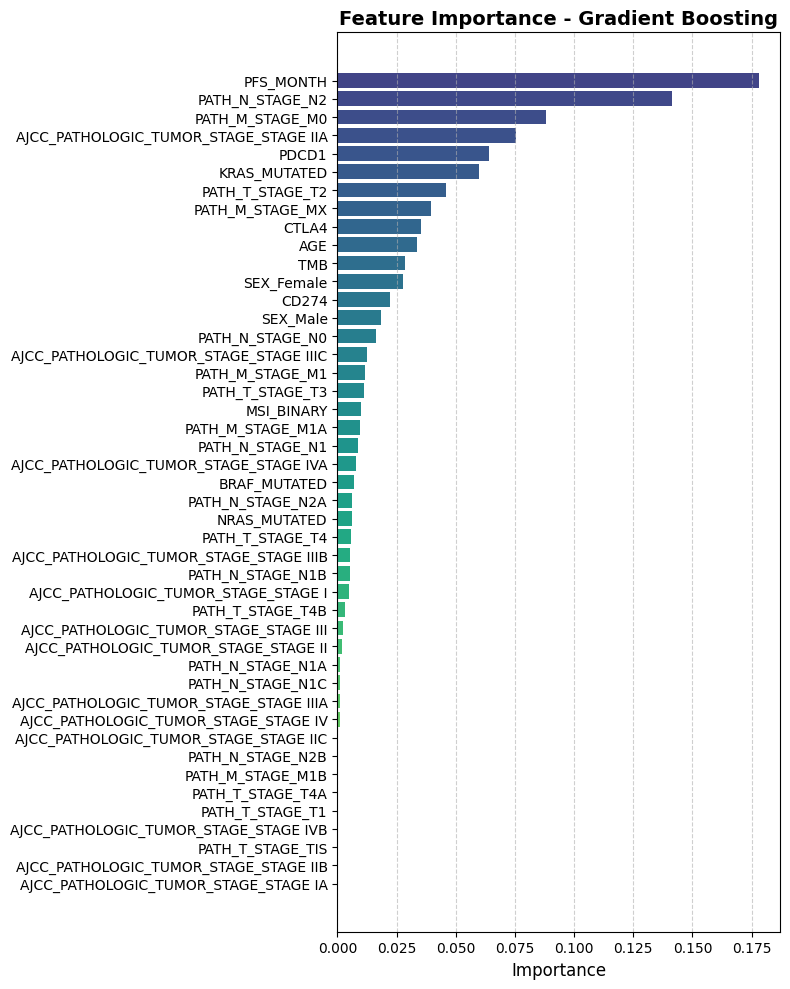

In [39]:
# store feature importances for each model
feature_importances = {}

# define feature names
feature_names = input_feat_data_scaled.columns if hasattr(input_feat_data_scaled, 'columns') else [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_importances[name] = importances

        # sort features by importance
        indices = np.argsort(importances)[::-1]
        sorted_importances = importances[indices]
        sorted_features = [feature_names[i] for i in indices]

        # color map
        cmap = cm.get_cmap('viridis')
        colors = cmap(np.linspace(0.2, 0.9, len(importances)))

        # plot (vertical layout using barh)
        plt.figure(figsize=(8, 10))
        bars = plt.barh(range(len(sorted_importances)), sorted_importances, color=colors)
        plt.title(f"Feature Importance - {name}", fontsize=14, fontweight='bold')
        plt.yticks(range(len(sorted_importances)), sorted_features)
        plt.xlabel("Importance", fontsize=12)
        plt.gca().invert_yaxis()  # most important feature at the top
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Model '{name}' does not support feature_importances_.")
